In [3]:
import pandas as pd

In [4]:
cols = ["V" + str(i) for i in range(1,61)]
cols += ["Class"]
df = pd.read_csv("datasets/sonar.all-data.csv", names = cols)

In [5]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [8]:
X = df.drop(["Class"], axis=1)
Y = df["Class"]

# Clustering

In [9]:
# Para el manejo de los datos
import numpy as np
import pandas as pd

# Para la visualización de los datos
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Obtención de los datasets que utilizaremos a lo largo del notebook
import statsmodels.api as sm
from sklearn import datasets

# Preprocesado de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Cálculo de distancias
from sklearn.metrics import pairwise_distances

# Modelos de clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

# Evaluación del clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [10]:
# Escalamos las variables
scaledData = scale(X=X, axis=0, with_mean=True, with_std=True)
scaledData = pd.DataFrame(scaledData, columns=X.columns, index=X.index)

In [11]:
# Guardamos en una lista los valores de inercia variando K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledData)
    inertia.append(kmeans.inertia_)

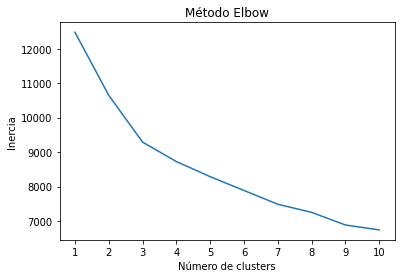

In [12]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [13]:
# Generamos el modelo con 3 clusters (mejor resultado para metodo del codo)
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaledData)

# Obtenemos a qué cluster pertence cada instancia
labels = kmeans.labels_

In [14]:
print(labels)

[2 1 1 0 1 1 1 1 2 2 2 2 1 2 2 1 0 1 2 1 1 0 0 2 2 2 1 2 1 1 2 2 1 1 1 2 2
 2 2 2 2 2 2 2 0 1 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0
 1 1 1 1 2 1 1 1 0 0 0 0 0 0 2 2 0 2 0 2 2 2 2 1 2 1 1 2 1 2 2 2 1 0 0 0 1
 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
# Obtenemos los centroides como los puntos representativos de cada cluster
print(kmeans.cluster_centers_)

[[ 0.72053119  0.71671513  0.54100026  0.42237882  0.24147567  0.16853736
   0.22986596  0.45534671  0.49324648  0.3750373   0.07735656  0.00249098
  -0.06387449 -0.2215578  -0.2607184  -0.31986643 -0.56440564 -0.78776775
  -0.73719305 -0.55642693 -0.62167534 -0.87570608 -0.93994534 -0.94813881
  -0.90754437 -0.66784885 -0.4691193  -0.03618699  0.2044264   0.67383227
   0.81135783  0.90576444  0.85633569  0.82366792  0.81655039  0.82495176
   0.8045624   1.10400718  1.14363637  1.08088116  1.28329969  1.25957497
   1.14569483  1.1429739   1.46427138  1.42398221  1.27001012  1.27988439
   1.1707462   1.02710352  0.86647066  0.82816153  0.63541975  0.52775321
   0.63308629  0.49539054  0.4225508   0.56367975  0.67314649  0.58097294]
 [ 0.12827588  0.14743644  0.20077158  0.27126054  0.37056511  0.39497261
   0.35860255  0.28760299  0.18243946  0.23007829  0.35141354  0.32939697
   0.47518041  0.73390744  0.83210399  0.86493829  0.905557    0.91782806
   0.85695502  0.74430483  0.70118653

In [16]:
# Obtenemos el número de iteraciones que han sido necesarias para converger
print(kmeans.n_iter_)

11


In [17]:
# Obtenemos el valor mínimo de la inercia
print(kmeans.inertia_)

9289.676149124984


In [18]:
# Realizamos un Análisis de Componentes Principales para visualizar los conjuntos
pca=PCA(n_components=2)
pcaData=pca.fit_transform(scaledData)

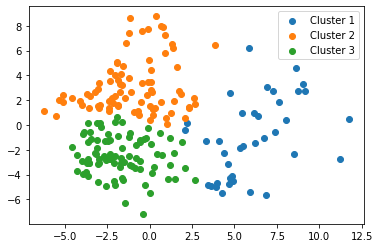

In [19]:
# Visualizamos las instancias en las dos dimensiones correspondientes con las componentes obtenidas
# Coloreamos por cluster
plt.scatter(pcaData[labels==0, 0], pcaData[labels==0, 1], label='Cluster 1')
plt.scatter(pcaData[labels==1, 0], pcaData[labels==1, 1], label='Cluster 2')
plt.scatter(pcaData[labels==2, 0], pcaData[labels==2, 1], label='Cluster 3')
plt.legend()
plt.show()

In [20]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), 
                 inertia, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

3

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledData)
    score = silhouette_score(scaledData, kmeans.labels_)
    silhouette_coefficients.append(score)

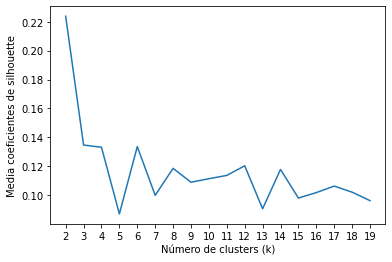

In [22]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Número de clusters (k)")
plt.ylabel("Media coeficientes de silhouette")
plt.show()

In [23]:
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    """Función que nos permite hacer un análisis de silhouette completo."""
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Para k =", n_clusters,
              "La media de silhouette es :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("El gráfico de silhouette para los distintos clusters.")
        ax1.set_xlabel("Los valores del coeficiente de silhouette")
        ax1.set_ylabel("Número de cluster")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("Visualización de los datos en clusters.")
        ax2.set_xlabel("Componente 1 de la PCA")
        ax2.set_ylabel("Componente 2 de la PCA")

        plt.suptitle(("\nAnálisis de silhouette para clustering con KMeans "
                      "con k = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Para k = 2 La media de silhouette es : 0.2178194633782484
Para k = 3 La media de silhouette es : 0.13471787253074766
Para k = 4 La media de silhouette es : 0.13649098052831896
Para k = 5 La media de silhouette es : 0.12229111527357212
Para k = 6 La media de silhouette es : 0.13686609352797682
Para k = 7 La media de silhouette es : 0.10803864268778789
Para k = 8 La media de silhouette es : 0.11879259314239257
Para k = 9 La media de silhouette es : 0.1165921836401728
Para k = 10 La media de silhouette es : 0.11484793099580967


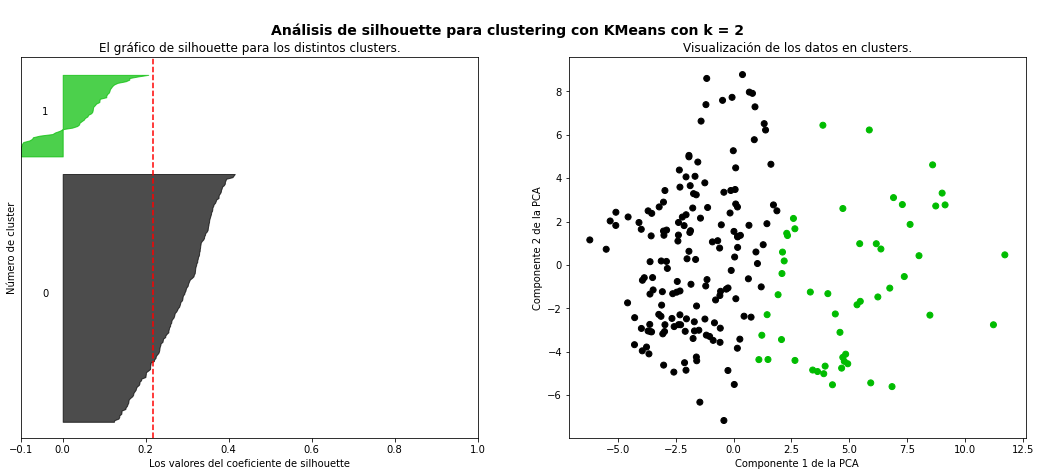

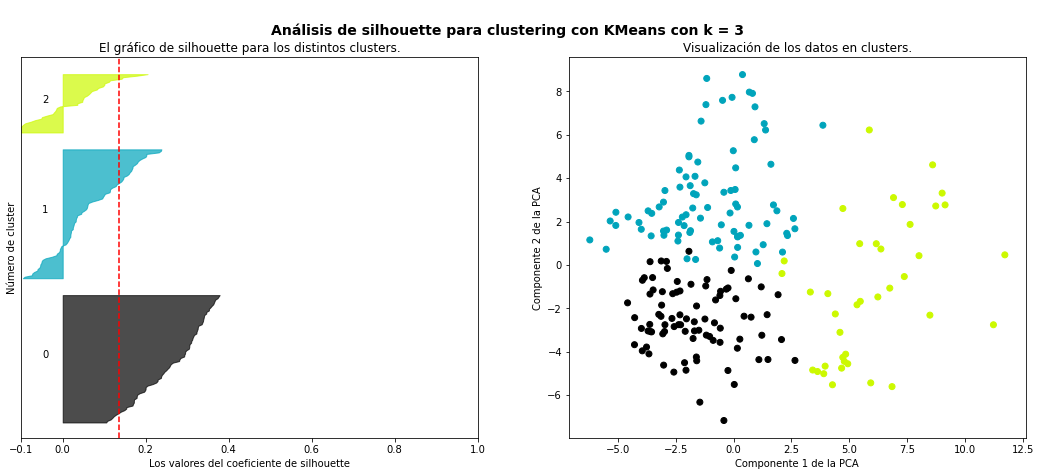

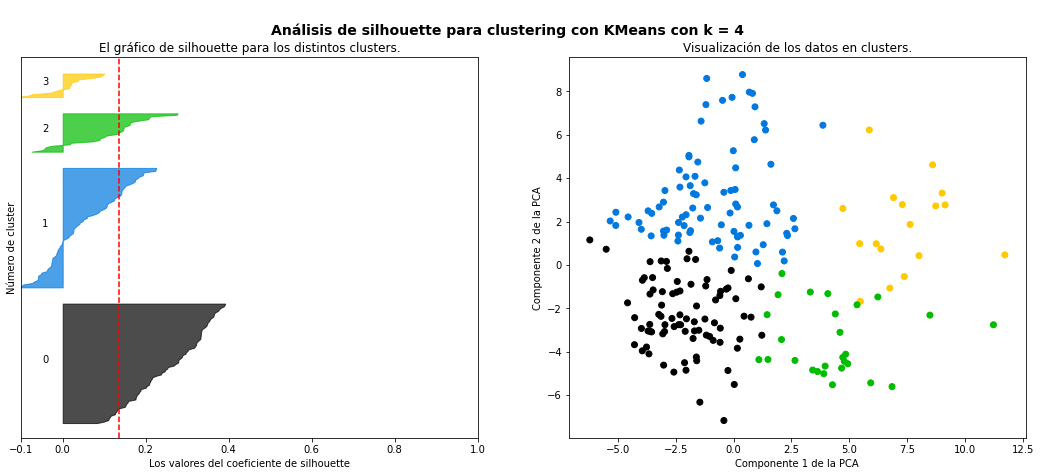

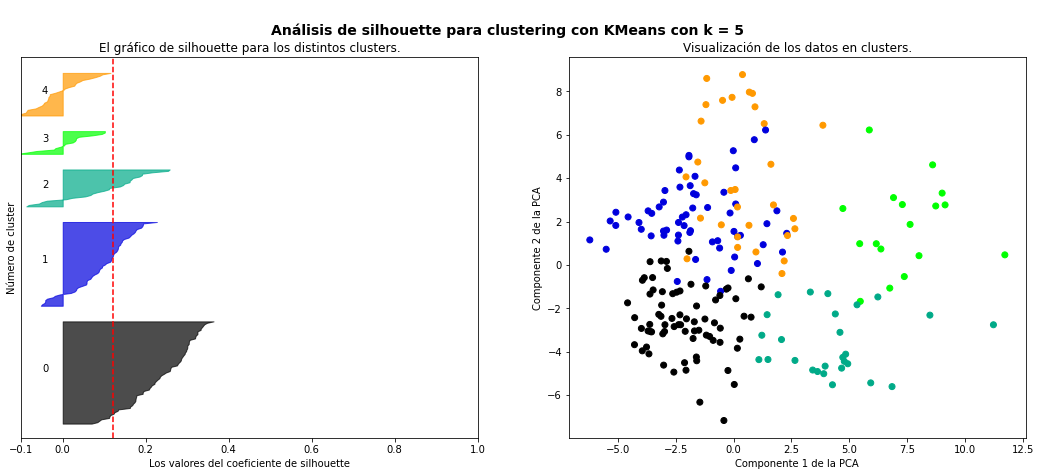

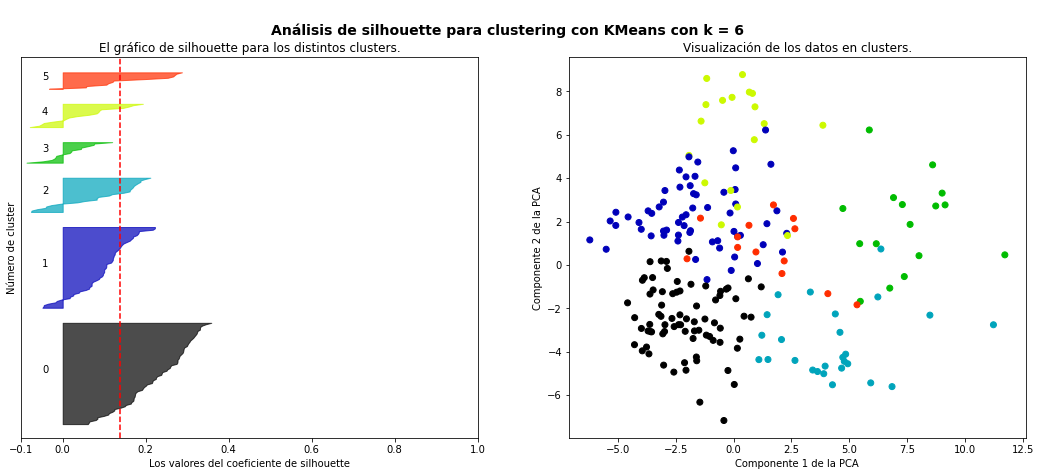

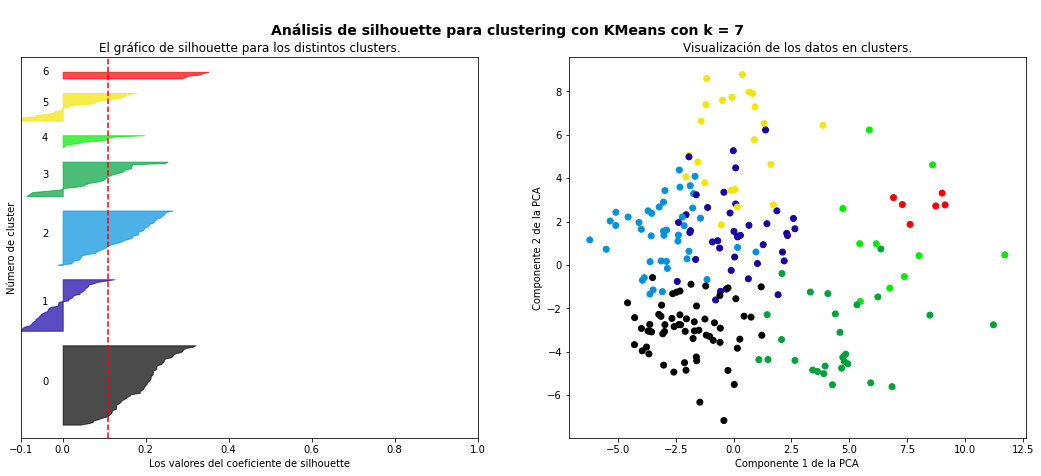

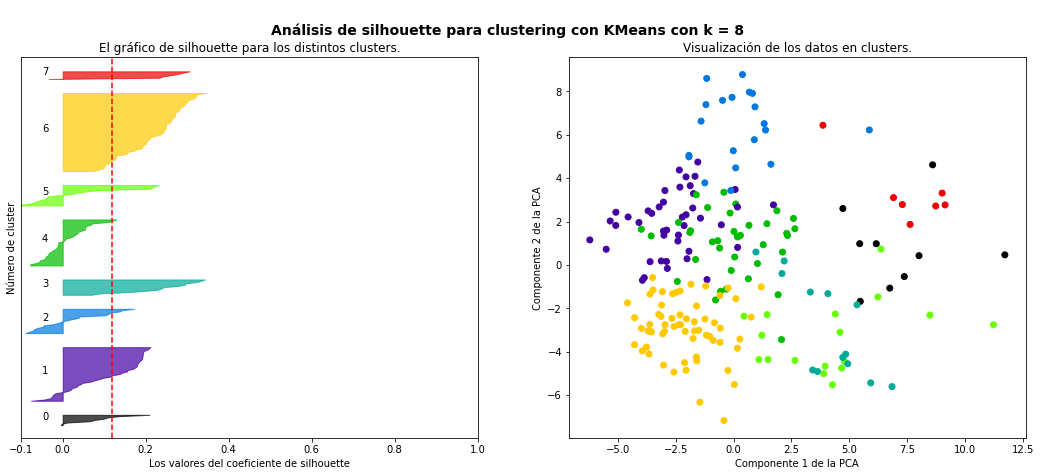

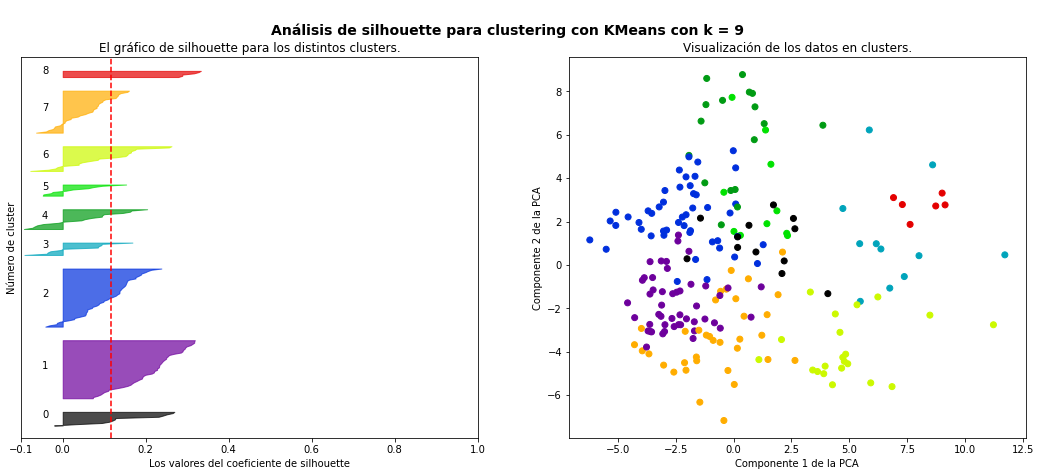

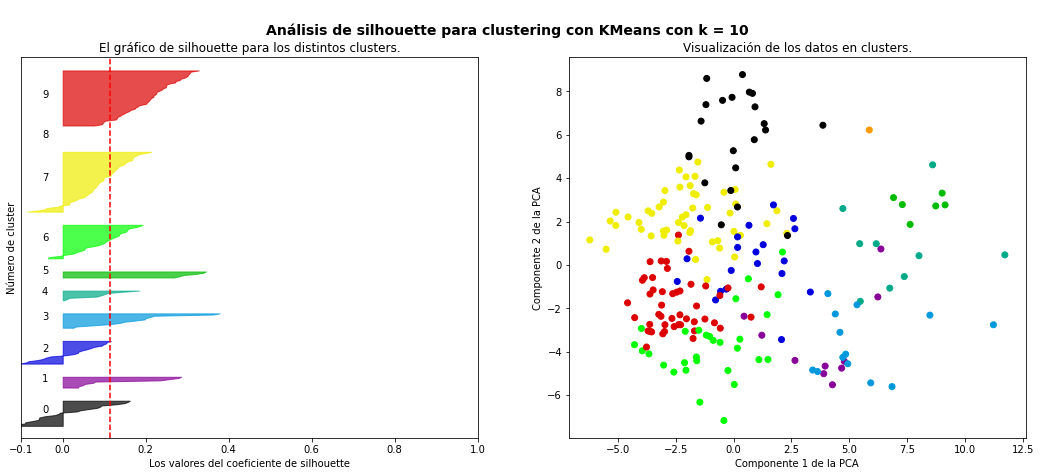

In [24]:
silhouette_analysis(np.array(scaledData), 
                    pd.DataFrame(pcaData), 
                    [2, 3, 4, 5, 6, 7, 8, 9, 10])